In [2]:
%matplotlib inline
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [3]:
data = co2 = pd.read_csv('CompleteDataset.csv')
data = data.dropna()
data = data[pd.notnull(data.Value)]

C:\Users\andre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
Vm = []
Vk = []
V = []
for i in data.Value:
    if "M" in i:
        x = i.replace("€","")
        x = x.replace("M","")
        Vm.append(float(x))
            
    if "K" in i:
        x = i.replace("€","")
        x = x.replace("K","")        
        Vk.append(float(x))
        
for i in Vm:
    V.append(i*1000)
    
for i in Vk:
    V.append(i)

In [5]:
Valor = pd.Series(V)
data["Valor"] = Valor
data = data[pd.notnull(data.Valor)]
tab = data[data.Overall>85]

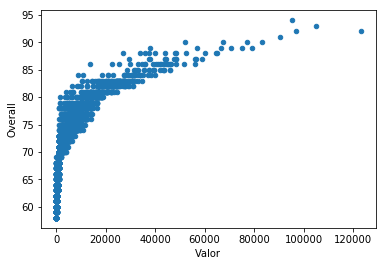

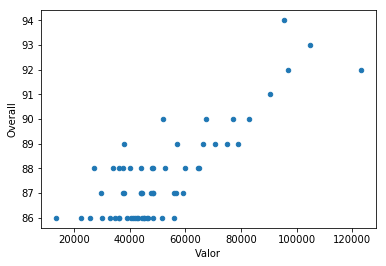

In [10]:
data.plot.scatter('Valor',"Overall");
tab.plot.scatter('Valor',"Overall");

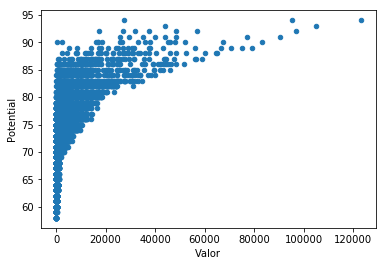

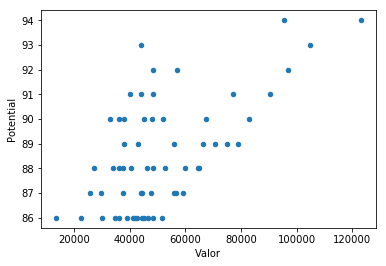

In [9]:
data.plot.scatter('Valor','Potential');
tab.plot.scatter('Valor','Potential');

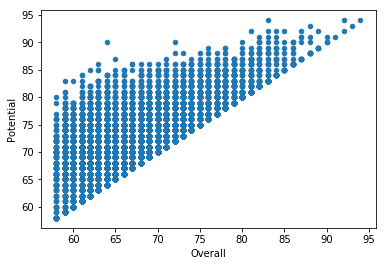

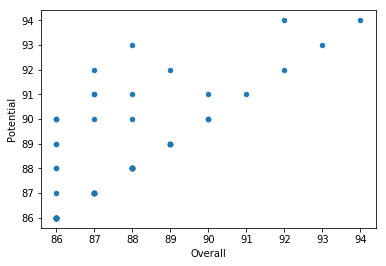

In [16]:
data.plot.scatter('Overall','Potential');
tab.plot.scatter('Overall','Potential');

In [12]:
#data[data.Potential >= 90].sort_values(by="Valor").Name

In [14]:
Y = data['Potential']
X = data['Valor']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Potential   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     5912.
Date:                Thu, 16 Nov 2017   Prob (F-statistic):               0.00
Time:                        13:46:39   Log-Likelihood:                -41677.
No. Observations:               13931   AIC:                         8.336e+04
Df Residuals:                   13929   BIC:                         8.337e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         70.6635      0.045   1569.338      0.000        70.575    70.752
Valor          0.0006   7.54e-06     76.889      0.000         0.001     0.001
==============================================================================
Omnibus:                      539.626   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1653.832
Skew:                          -0.064   Prob(JB):                         0.00
Kurtosis:                       4.683   Cond. No.                     6.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""